# Breast Cancer Prediction Model

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
pip install mpld3

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import mpld3 as mpl

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [5]:
data = pd.read_csv("data.csv")

In [6]:
# display top 5 rows of dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
len(data)

569

# Preparing the data

In [9]:
# dropping columns "id" and "Unnamed: 32" because they serve no purpose in the ML model
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [10]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
# converting data in "diagnosis" to numeric values
data.diagnosis = data.diagnosis.map({"B":0,"M":1})

In [13]:
data.head()
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Exploring the data

In [14]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


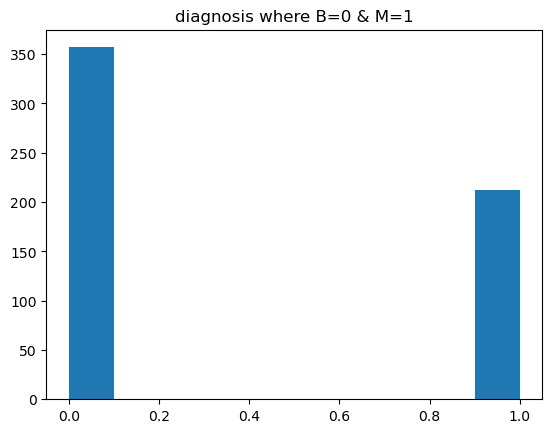

In [15]:
plt.hist(data.diagnosis)
plt.title('diagnosis where B=0 & M=1')
plt.show()

## plotting diagnosis vs each feature of the cell nucleus

In [16]:
features = list(data.columns[1:11])
# splitting data into two parts based on diagnosis
dataBenign=data[data.diagnosis ==0]
dataMalignant=data[data.diagnosis ==1]

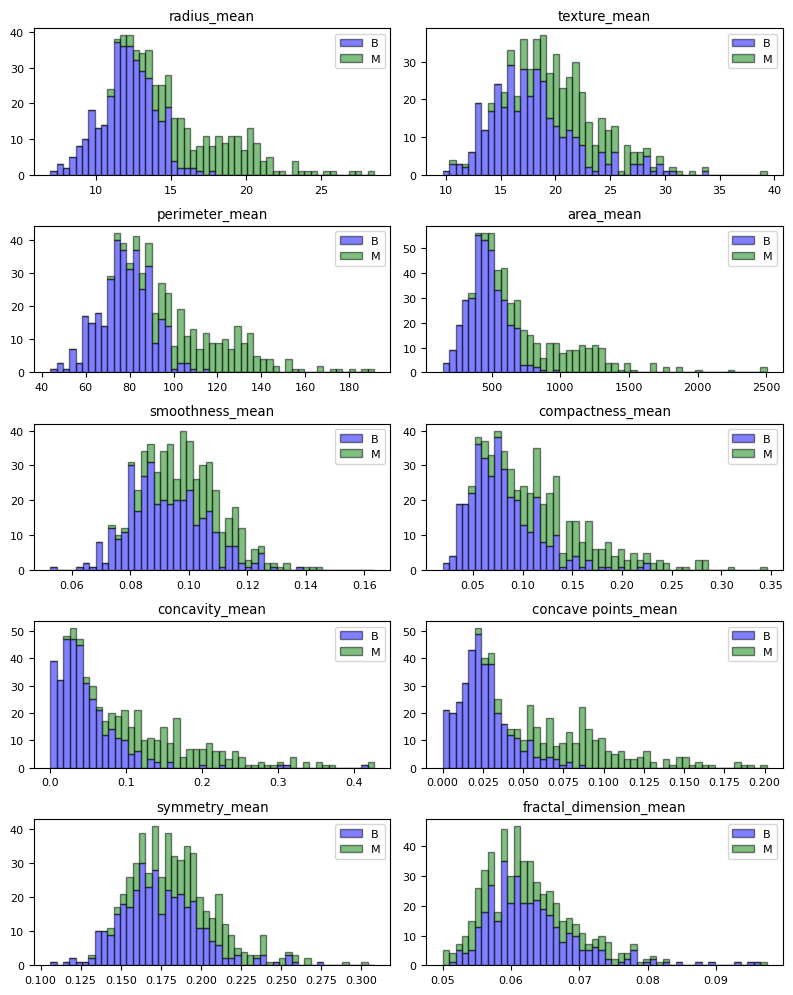

In [17]:
# plotting
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features[idx]]) - min(data[features[idx]]))/50
    ax.hist([dataBenign[features[idx]],dataMalignant[features[idx]]], bins=np.arange(min(data[features[idx]]), max(data[features[idx]]) + binwidth, binwidth) ,rwidth=20,alpha=0.5,stacked=True,edgecolor = "black", label=['B','M'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features[idx])
plt.tight_layout()
plt.show()


In [18]:
# splitting dataset into feature class and target class
feature = data.loc[:,"radius_mean":"fractal_dimension_worst"]
target = data.loc[:,"diagnosis"]

In [19]:
# only using the top correlated features for models
columns = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean']
X = feature.loc[:, columns]
feature = X

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
feature = sc.fit_transform(feature)

In [21]:
# splitting into training and testing
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=0) # 70% training and 30% test

In [22]:
target_train.value_counts()

0    249
1    149
Name: diagnosis, dtype: int64

### Random Forest

Cross-validation scores: [0.85964912 0.92105263 0.92982456 0.94736842 0.92920354]
Average score: 0.92
Standard deviation of score: 0.03


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


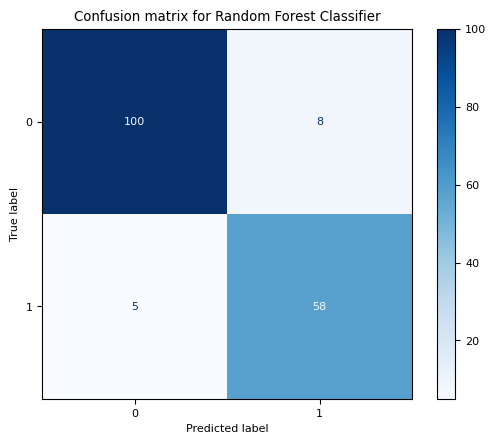

Accuracy: 92.40%
Precision Score: 91.56%
Recall Score: 92.33%
F1 Score: 91.91%


In [23]:
# create a Random Forest classifier with 100 trees
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(feature_train, target_train)
target_pred = rfc.predict(feature_test)

from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, feature, target, cv=5)
print("Cross-validation scores: {}".format(score))
print("Average score: {:.2f}".format(score.mean()))
print("Standard deviation of score: {:.2f}".format(score.std()))

cm = confusion_matrix(target_test, target_pred)
plot_confusion_matrix(rfc, feature_test, target_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Random Forest Classifier')
plt.show()

print("Accuracy: {:.2f}%".format(metrics.accuracy_score(target_test, target_pred)*100))
print("Precision Score: {:.2f}%".format(metrics.precision_score(target_test, target_pred,average='macro',zero_division=0)*100))
print("Recall Score: {:.2f}%".format(metrics.recall_score(target_test, target_pred,average='macro')*100))
print("F1 Score: {:.2f}%".format(metrics.f1_score(target_test, target_pred,average='macro')*100))

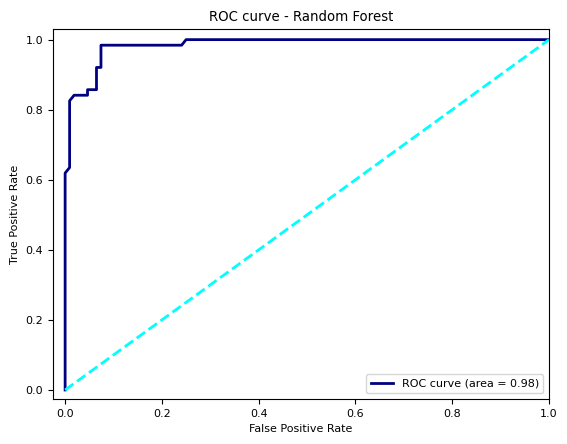

In [24]:
from sklearn.metrics import roc_curve, auc

target_pred_proba_rfc = rfc.predict_proba(feature_test)[::,1]
fpr_rfc, tpr_rfc, _ = metrics.roc_curve(target_test, target_pred_proba_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

plt.figure()
plt.plot(fpr_rfc, tpr_rfc, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='cyan', lw=2, linestyle='--')
plt.xlim([-0.025, 1.0])
plt.ylim([-0.025, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

Cross-validation scores: [0.87719298 0.87719298 0.87719298 0.95614035 0.92035398]
Average score: 0.90
Standard deviation of score: 0.03


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


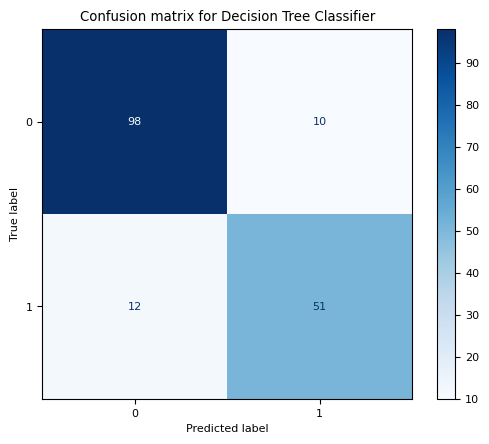

Accuracy: 87.13%
Precision Score: 86.35%
Recall Score: 85.85%
F1 Score: 86.08%


In [25]:
dtc = DecisionTreeClassifier()
dtc.fit(feature_train, target_train)
target_pred = dtc.predict(feature_test)

from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, feature, target, cv=5)
print("Cross-validation scores: {}".format(score))
print("Average score: {:.2f}".format(score.mean()))
print("Standard deviation of score: {:.2f}".format(score.std()))

cm = confusion_matrix(target_test, target_pred)
plot_confusion_matrix(dtc, feature_test, target_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Decision Tree Classifier')
plt.show()

print("Accuracy: {:.2f}%".format(metrics.accuracy_score(target_test, target_pred)*100))
print("Precision Score: {:.2f}%".format(metrics.precision_score(target_test, target_pred,average='macro',zero_division=0)*100))
print("Recall Score: {:.2f}%".format(metrics.recall_score(target_test, target_pred,average='macro')*100))
print("F1 Score: {:.2f}%".format(metrics.f1_score(target_test, target_pred,average='macro')*100))

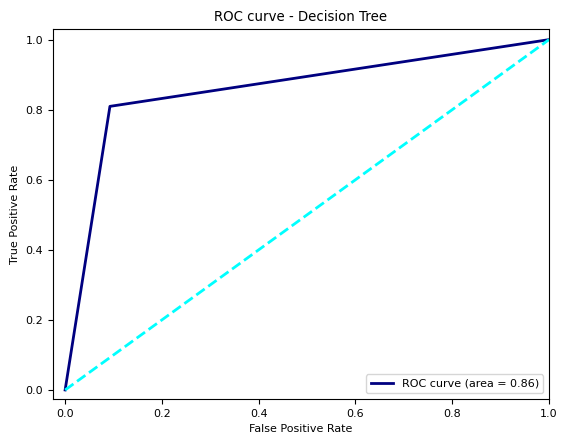

In [26]:
from sklearn.metrics import roc_curve, auc

target_pred_proba_dtc = dtc.predict_proba(feature_test)[::,1]
fpr_dtc, tpr_dtc, _ = metrics.roc_curve(target_test, target_pred_proba_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

plt.figure()
plt.plot(fpr_dtc, tpr_dtc, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dtc)
plt.plot([0, 1], [0, 1], color='cyan', lw=2, linestyle='--')
plt.xlim([-0.025, 1.0])
plt.ylim([-0.025, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression

Cross-validation scores: [0.84210526 0.92982456 0.92982456 0.92982456 0.92920354]
Average score: 0.91
Standard deviation of score: 0.04


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


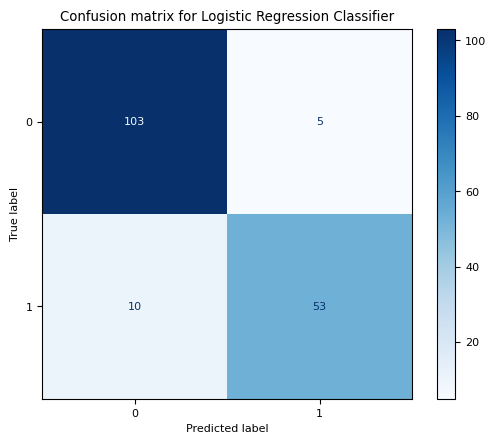

Accuracy: 91.23%
Precision Score: 91.26%
Recall Score: 89.75%
F1 Score: 90.41%


In [27]:
lrc = LogisticRegression(max_iter = 1000, random_state = 0)
lrc.fit(feature_train, target_train)
target_pred = lrc.predict(feature_test)

from sklearn.model_selection import cross_val_score
score = cross_val_score(lrc, feature, target, cv=5)
print("Cross-validation scores: {}".format(score)) 
print("Average score: {:.2f}".format(score.mean()))
print("Standard deviation of score: {:.2f}".format(score.std()))

cm = confusion_matrix(target_test, target_pred)
plot_confusion_matrix(lrc, feature_test, target_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Logistic Regression Classifier')
plt.show()

print("Accuracy: {:.2f}%".format(metrics.accuracy_score(target_test, target_pred)*100))
print("Precision Score: {:.2f}%".format(metrics.precision_score(target_test, target_pred,average='macro',zero_division=0)*100))
print("Recall Score: {:.2f}%".format(metrics.recall_score(target_test, target_pred,average='macro')*100))
print("F1 Score: {:.2f}%".format(metrics.f1_score(target_test, target_pred,average='macro')*100))

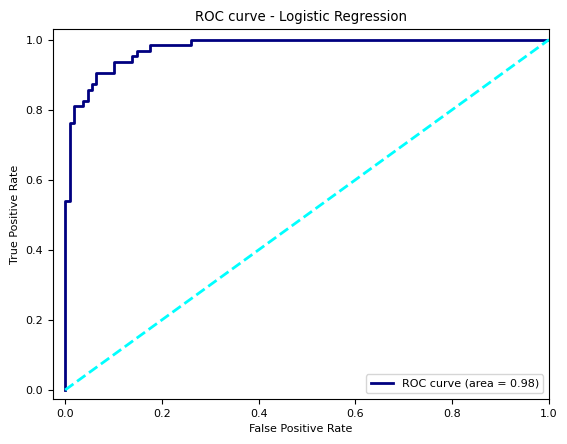

In [28]:
from sklearn.metrics import roc_curve, auc

target_pred_proba_lrc = lrc.predict_proba(feature_test)[::,1]
fpr_lrc, tpr_lrc, _ = metrics.roc_curve(target_test, target_pred_proba_lrc)
roc_auc_lrc = auc(fpr_lrc, tpr_lrc)

plt.figure()
plt.plot(fpr_lrc, tpr_lrc, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lrc)
plt.plot([0, 1], [0, 1], color='cyan', lw=2, linestyle='--')
plt.xlim([-0.025, 1.0])
plt.ylim([-0.025, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### SVM

Cross-validation scores: [0.85087719 0.94736842 0.92982456 0.92982456 0.92920354]
Average score: 0.92
Standard deviation of score: 0.03


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


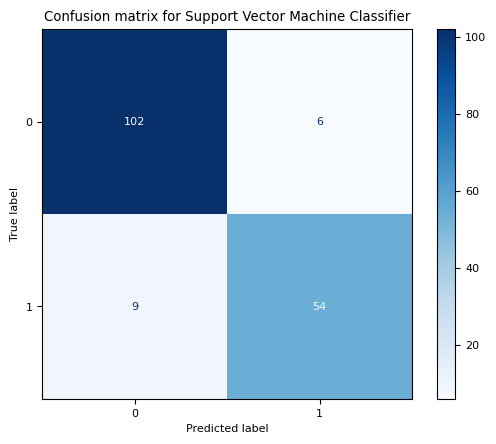

Accuracy: 91.23%
Precision Score: 90.95%
Recall Score: 90.08%
F1 Score: 90.48%


In [29]:
from sklearn.svm import SVC

svm = SVC(probability=True, kernel='linear', C=1)
svm.fit(feature_train, target_train)
target_pred = svm.predict(feature_test)

from sklearn.model_selection import cross_val_score
score = cross_val_score(svm, feature, target, cv=5)
print("Cross-validation scores: {}".format(score)) 
print("Average score: {:.2f}".format(score.mean()))
print("Standard deviation of score: {:.2f}".format(score.std()))

from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(target_test, target_pred)
plot_confusion_matrix(svm, feature_test, target_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Support Vector Machine Classifier')
plt.show()

print("Accuracy: {:.2f}%".format(metrics.accuracy_score(target_test, target_pred)*100))
print("Precision Score: {:.2f}%".format(metrics.precision_score(target_test, target_pred,average='macro',zero_division=0)*100))
print("Recall Score: {:.2f}%".format(metrics.recall_score(target_test, target_pred,average='macro')*100))
print("F1 Score: {:.2f}%".format(metrics.f1_score(target_test, target_pred,average='macro')*100))

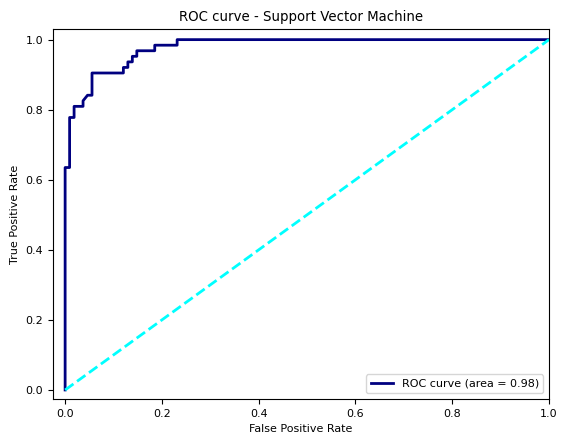

In [30]:
from sklearn.metrics import roc_curve, auc

target_pred_proba_svm = svm.predict_proba(feature_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(target_test, target_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='cyan', lw=2, linestyle='--')
plt.xlim([-0.025, 1.0])
plt.ylim([-0.025, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Support Vector Machine')
plt.legend(loc="lower right")
plt.show()

### Combined Ensemble model of 4 classifiers above

Cross-validation scores: [0.85087719 0.92982456 0.90350877 0.94736842 0.9380531 ]
Average score: 0.91
Standard deviation of score: 0.03


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


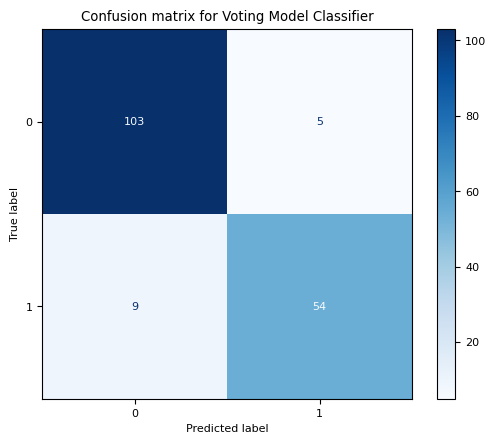

Accuracy: 91.81%
Precision Score: 91.74%
Recall Score: 90.54%
F1 Score: 91.08%


In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

voting_model = VotingClassifier(estimators=[('rf', rfc), ('dt', dtc), ('lr', lrc), ('svm', svm)], voting='soft')
voting_model.fit(feature_train, target_train)
target_pred = voting_model.predict(feature_test)

from sklearn.model_selection import cross_val_score
score = cross_val_score(voting_model, feature, target, cv=5)
print("Cross-validation scores: {}".format(score)) 
print("Average score: {:.2f}".format(score.mean()))
print("Standard deviation of score: {:.2f}".format(score.std()))

from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(target_test, target_pred)
plot_confusion_matrix(voting_model, feature_test, target_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Voting Model Classifier')
plt.show()

print("Accuracy: {:.2f}%".format(metrics.accuracy_score(target_test, target_pred)*100))
print("Precision Score: {:.2f}%".format(metrics.precision_score(target_test, target_pred,average='macro',zero_division=0)*100))
print("Recall Score: {:.2f}%".format(metrics.recall_score(target_test, target_pred,average='macro')*100))
print("F1 Score: {:.2f}%".format(metrics.f1_score(target_test, target_pred,average='macro')*100))

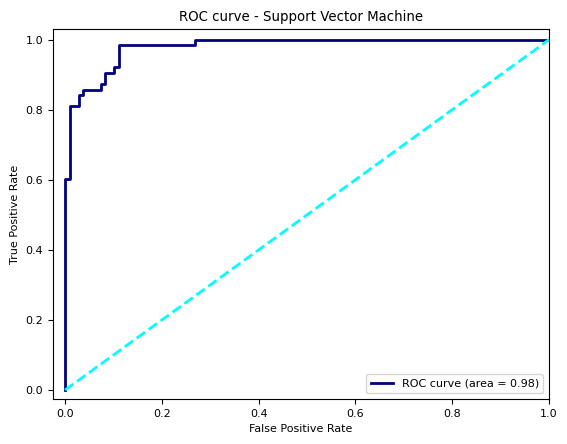

In [32]:
from sklearn.metrics import roc_curve, auc

target_pred_proba_vm = voting_model.predict_proba(feature_test)[::,1]
fpr_vm, tpr_vm, _ = metrics.roc_curve(target_test, target_pred_proba_vm)
roc_auc_vm = auc(fpr_vm, tpr_vm)

plt.figure()
plt.plot(fpr_vm, tpr_vm, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_vm)
plt.plot([0, 1], [0, 1], color='cyan', lw=2, linestyle='--')
plt.xlim([-0.025, 1.0])
plt.ylim([-0.025, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Support Vector Machine')
plt.legend(loc="lower right")
plt.show()

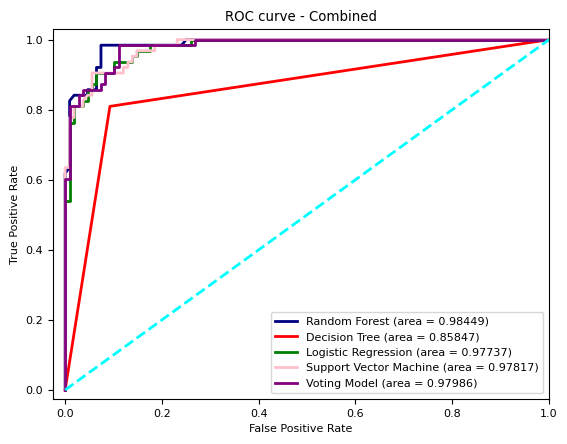

In [33]:
plt.figure()

plt.plot(fpr_rfc, tpr_rfc, color='navy', lw=2, label='Random Forest (area = %0.5f)' % roc_auc_rfc)
plt.plot(fpr_dtc, tpr_dtc, color='red', lw=2, label='Decision Tree (area = %0.5f)' % roc_auc_dtc)
plt.plot(fpr_lrc, tpr_lrc, color='green', lw=2, label='Logistic Regression (area = %0.5f)' % roc_auc_lrc)
plt.plot(fpr_svm, tpr_svm, color='pink', lw=2, label='Support Vector Machine (area = %0.5f)' % roc_auc_svm)
plt.plot(fpr_vm, tpr_vm, color='purple', lw=2, label='Voting Model (area = %0.5f)' % roc_auc_vm)

plt.plot([0, 1], [0, 1], color='cyan', lw=2, linestyle='--')
plt.xlim([-0.025, 1.0])
plt.ylim([-0.025, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Combined')
plt.legend(loc="lower right")
plt.show()

##### The model is trained and tested on the Breast Cancer dataset. We will now introduce a new dataset for final testing - the Lung Cancer dataset
##### The performance is first tested by testing the data directly using the random forest classifier

In [34]:
lung_data = pd.read_csv("datamean.csv")

In [35]:
lung_data

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean
0,0,15.32,96.258399,537.339336,0.158278,0.08671,0.136051
1,0,17.86,112.217690,802.103968,0.079808,0.05221,0.068191
2,0,11.39,71.565481,207.565412,0.489570,0.09549,0.074604
3,1,20.58,129.307954,1130.578843,0.028746,0.00749,0.059358
4,0,9.82,61.700880,302.951319,0.207332,0.01314,0.090514
...,...,...,...,...,...,...,...
294,0,8.61,54.098225,232.892861,0.264576,0.04903,0.133525
295,1,17.38,109.201761,748.963300,0.091608,0.04187,0.103293
296,1,20.19,126.857511,1080.626577,0.034785,0.07707,0.111845
297,1,15.82,99.399992,586.253933,0.139102,0.08098,0.119305


In [36]:
# splitting lung cancer dataset into features and target class
feature = lung_data.loc[:,"radius_mean":"concave points_mean"]
target = lung_data.loc[:,"diagnosis"]

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
feature = sc.fit_transform(feature)

In [38]:
target_pred = rfc.predict(feature)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


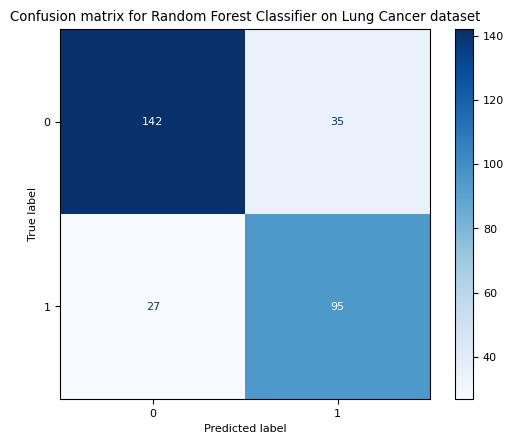

Accuracy: 79.26%
Precision Score: 78.55%
Recall Score: 79.05%
F1 Score: 78.74%


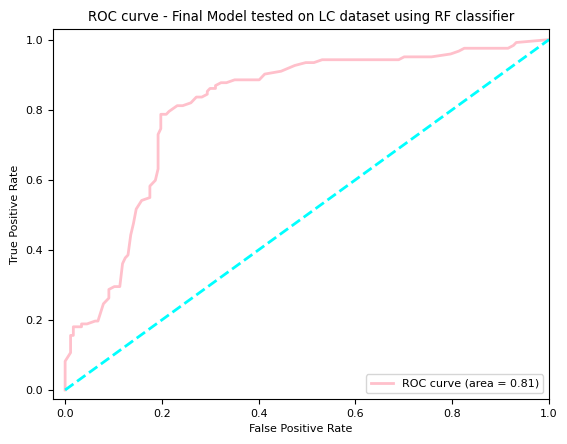

In [39]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(target, target_pred)
plot_confusion_matrix(rfc, feature, target, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Random Forest Classifier on Lung Cancer dataset')
plt.show()

print("Accuracy: {:.2f}%".format(metrics.accuracy_score(target, target_pred)*100))
print("Precision Score: {:.2f}%".format(metrics.precision_score(target, target_pred,average='macro',zero_division=0)*100))
print("Recall Score: {:.2f}%".format(metrics.recall_score(target, target_pred,average='macro')*100))
print("F1 Score: {:.2f}%".format(metrics.f1_score(target, target_pred,average='macro')*100))

from sklearn.metrics import roc_curve, auc

target_pred_proba = rfc.predict_proba(feature)[::,1]
fpr, tpr, _ = metrics.roc_curve(target, target_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='cyan', lw=2, linestyle='--')
plt.xlim([-0.025, 1.0])
plt.ylim([-0.025, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Final Model tested on LC dataset using RF classifier')
plt.legend(loc="lower right")
plt.show()



##### The performance is now tested using a neural network first without fine-tuning and then with fine-tuning

neural network without tuning:


2023-04-21 11:05:09.316740: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
18/18 [==============================] - 1s 2ms/step - loss: 0.3726
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3726
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3726
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3726
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3726
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3726
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3726
Epoch 8/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3726
Epoch 9/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3726
Epoch 10/10
10/10 [==============================] - 0s 1ms/step


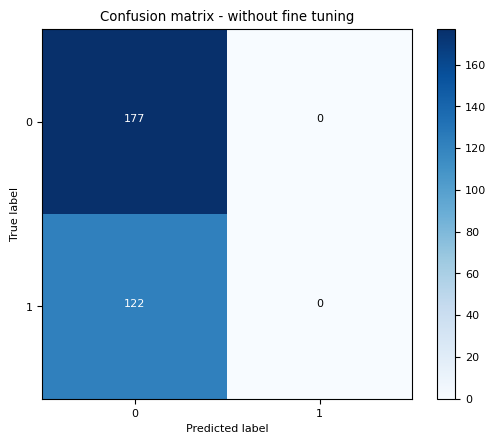

Accuracy: 59.20%
Precision Score: 29.60%
Recall Score: 50.00%
F1 Score: 37.18%


In [40]:
print("neural network without tuning:")

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
import numpy as np
from tensorflow import keras

breast_data = pd.read_csv("data.csv")
breast_data.drop(['id','Unnamed: 32'],axis=1,inplace=True)
breast_data.diagnosis = breast_data.diagnosis.map({"B":0,"M":1})
breast_feature = breast_data.loc[:,"radius_mean":"fractal_dimension_worst"]
breast_target = breast_data.loc[:,"diagnosis"]
columns = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean']
X = breast_feature.loc[:, columns]
breast_feature = X

lung_data = pd.read_csv("datamean.csv")
lung_feature = lung_data.loc[:,"radius_mean":"concave points_mean"]
lung_target = lung_data.loc[:,"diagnosis"]

# define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation="relu", input_shape=[6]),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# compile the model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

# train the model
model.fit(breast_feature, breast_target, epochs=10)

# make predictions
probabilities = model.predict(lung_feature)
predictions = (probabilities > 0.5)

fpr1, tpr1, _ = roc_curve(lung_target, probabilities)
roc_auc1 = auc(fpr1, tpr1)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
predicted_labels = (probabilities > 0.5).astype(int)
cm = confusion_matrix(lung_target, predicted_labels)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix - without fine tuning')
plt.colorbar()
tick_marks = np.arange(len(set(lung_target)))
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > (cm.max() / 2) else "black")
plt.show()

print("Accuracy: {:.2f}%".format(metrics.accuracy_score(lung_target, predictions)*100))
print("Precision Score: {:.2f}%".format(metrics.precision_score(lung_target, predictions,average='macro',zero_division=0)*100))
print("Recall Score: {:.2f}%".format(metrics.recall_score(lung_target, predictions,average='macro')*100))
print("F1 Score: {:.2f}%".format(metrics.f1_score(lung_target, predictions,average='macro')*100))


neural network with tuning:
Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 25.8711 - accuracy: 0.6063
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 7.0122 - accuracy: 0.3076
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 5.7911 - accuracy: 0.1968
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 4.9542 - accuracy: 0.2302
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 4.4547 - accuracy: 0.1898
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 3.3685 - accuracy: 0.1547
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 2.2586 - accuracy: 0.2197
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.8816 - accuracy: 0.5870
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8453
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3411

18/18 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8858
Epoch 83/100
18/18 [==============================] - 0s 1ms/step - loss: 0.2979 - accuracy: 0.8717
Epoch 84/100
18/18 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.8717
Epoch 85/100
18/18 [==============================] - 0s 1ms/step - loss: 0.2959 - accuracy: 0.8717
Epoch 86/100
18/18 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8752
Epoch 87/100
18/18 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8612
Epoch 88/100
18/18 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8541
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8541
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8822
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8717
Epoch 92/100


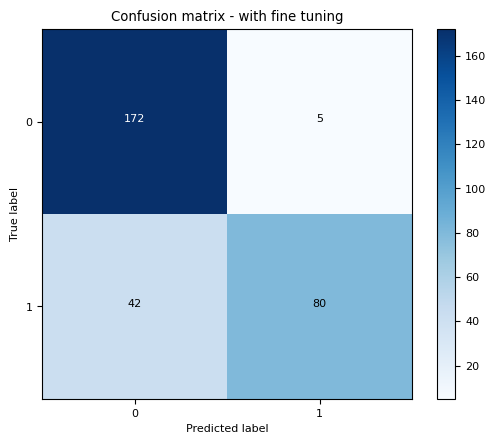

Accuracy: 84.28%
Precision Score: 87.25%
Recall Score: 81.37%
F1 Score: 82.64%


In [41]:
print("neural network with tuning:")

import tensorflow as tf
import numpy as np
from tensorflow import keras

breast_data = pd.read_csv("data.csv")
breast_data.drop(['id','Unnamed: 32'],axis=1,inplace=True)
breast_data.diagnosis = breast_data.diagnosis.map({"B":0,"M":1})
breast_feature = breast_data.loc[:,"radius_mean":"fractal_dimension_worst"]
breast_target = breast_data.loc[:,"diagnosis"]
columns = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean']
X = breast_feature.loc[:, columns]
breast_feature = X

lung_data = pd.read_csv("datamean.csv")
lung_feature = lung_data.loc[:,"radius_mean":"concave points_mean"]
lung_target = lung_data.loc[:,"diagnosis"]


# define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation="relu", input_shape=[6]),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# compile the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# train the model
model.fit(breast_feature, breast_target, epochs=100)

# make predictions
probabilities = model.predict(lung_feature)
predictions = (probabilities > 0.5)

fpr2, tpr2, _ = roc_curve(lung_target, probabilities)
roc_auc2 = auc(fpr2, tpr2)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
predicted_labels = (probabilities > 0.5).astype(int)
cm = confusion_matrix(lung_target, predicted_labels)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix - with fine tuning')
plt.colorbar()
tick_marks = np.arange(len(set(lung_target)))
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > (cm.max() / 2) else "black")
plt.show()


print("Accuracy: {:.2f}%".format(metrics.accuracy_score(lung_target, predictions)*100))
print("Precision Score: {:.2f}%".format(metrics.precision_score(lung_target, predictions,average='macro',zero_division=0)*100))
print("Recall Score: {:.2f}%".format(metrics.recall_score(lung_target, predictions,average='macro')*100))
print("F1 Score: {:.2f}%".format(metrics.f1_score(lung_target, predictions,average='macro')*100))


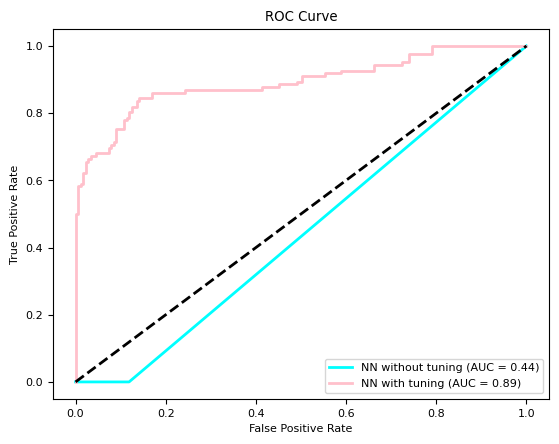

In [42]:
# plot ROC curves
plt.figure()
plt.plot(fpr1, tpr1, color='cyan', lw=2, label='NN without tuning (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='pink', lw=2, label='NN with tuning (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()